# Установка библиотеки и инициализация модели

In [ ]:
!pip install blocksnet ipykernel mapclassify -qq

In [ ]:
import geopandas as gpd
import pandas as pd

import os
import warnings
warnings.filterwarnings("ignore") # отключаем все предупреждения

Добавляем переменную ```data_path```, в которую будем складывать результаты работы в блокноте. Обратите внимание, что также необходимо создать папку ```data``` в директории.

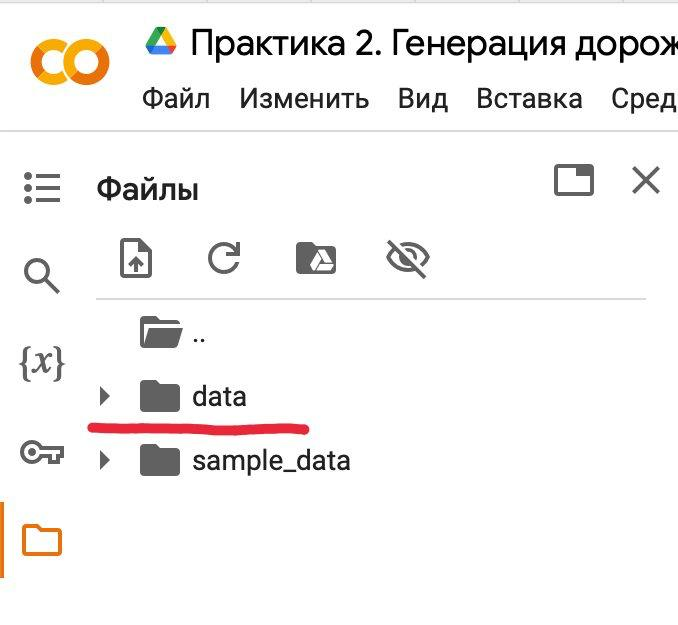

In [ ]:
data_path = '/content/data/' # в эту папку нужно положить geojson файл с нарезанными кварталми на прошлом занятии

In [ ]:
blocks = gpd.read_file(os.path.join('blocks.geojson')) # считываем в переменную наши кварталы

In [ ]:
blocks

,geometry
0,"POLYGON ((333323.312 6622195.666, 333492.308 6..."
1,"POLYGON ((332093.546 6621911.376, 331958.920 6..."
2,"POLYGON ((332689.530 6621987.082, 332689.511 6..."
3,"POLYGON ((332105.166 6620336.872, 331376.389 6..."
4,"POLYGON ((333135.437 6622119.708, 333086.687 6..."
...,...
99,"POLYGON ((332629.584 6622881.096, 332712.260 6..."
100,"POLYGON ((330632.299 6624257.720, 330771.703 6..."
101,"POLYGON ((330771.703 6624034.109, 330632.299 6..."
102,"POLYGON ((332075.931 6622870.747, 332029.792 6..."


In [ ]:
accessibility_matrix =  pd.read_pickle(os.path.join('acc_mx.pickle')) # считываем в переменную наши кварталы

In [ ]:
accessibility_matrix

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,2.859375,2.318359,5.464844,2.318359,1.793945,2.859375,2.859375,2.699219,2.501953,...,5.464844,2.501953,4.066406,4.539062,4.539062,2.753906,9.179688,11.078125,4.699219,10.406250
1,2.859375,0.000000,1.589844,2.925781,1.589844,1.066406,0.000000,0.000000,0.161011,2.779297,...,2.925781,2.779297,1.528320,2.000000,2.000000,2.025391,6.640625,8.546875,2.160156,7.863281
2,2.318359,1.589844,0.000000,4.191406,0.000000,0.523926,1.589844,1.589844,1.428711,2.238281,...,4.191406,2.238281,2.796875,3.267578,3.267578,1.484375,7.906250,9.812500,3.429688,9.132812
3,3.863281,1.822266,2.593750,0.000000,2.593750,2.068359,1.822266,1.822266,1.661133,3.783203,...,0.000000,3.783203,1.129883,1.601562,1.601562,1.691406,6.242188,8.148438,1.762695,7.468750
4,2.318359,1.589844,0.000000,4.191406,0.000000,0.523926,1.589844,1.589844,1.428711,2.238281,...,4.191406,2.238281,2.796875,3.267578,3.267578,1.484375,7.906250,9.812500,3.429688,9.132812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2.753906,2.025391,1.484375,3.980469,1.484375,0.959961,2.025391,2.025391,1.865234,2.673828,...,3.980469,2.673828,2.583984,3.056641,3.056641,0.000000,7.695312,9.601562,3.216797,8.921875
100,9.312500,7.273438,8.046875,5.453125,8.046875,7.523438,7.273438,7.273438,7.113281,9.234375,...,5.453125,9.234375,6.582031,7.054688,7.054688,7.144531,0.000000,7.406250,4.480469,6.726562
101,11.218750,9.179688,9.945312,7.355469,9.945312,9.421875,9.179688,9.179688,9.015625,11.140625,...,7.355469,11.140625,8.484375,8.960938,8.960938,9.046875,7.406250,0.000000,6.382812,2.951172
102,4.835938,2.796875,3.566406,0.974121,3.566406,3.042969,2.796875,2.796875,2.634766,4.757812,...,0.974121,4.757812,2.103516,2.576172,2.576172,2.664062,4.480469,6.382812,0.000000,5.703125


In [ ]:
#from blocksnet import City
#Lagov = City.from_pickle(os.path.join('city_model(1).pickle')) # считываем в переменную готовую модель

In [ ]:
from blocksnet import City

blocks['land_use'] = None

Lagov = City(
blocks=blocks,
acc_mx=accessibility_matrix,
 )

print(Lagov)

CRS : EPSG:32636
Blocks : 104
Service types : 0/66
Buildings : 0
Services : 0



# Подготовка данных по зданиям

## Загрузка зданий с OSM

In [ ]:
import osmnx as ox

# Определяем город
city_name = "Лаголовское сельское поселение, Ленинградская область"

# Загружаем здания в пределах города
buildings = ox.geometries_from_place(city_name, tags={'building': True})

# Просмотр первых строк данных
buildings

geometry  \
element_type osmid                                                            
node         9891937565                           POINT (30.00776 59.71447)   
             9891937566                           POINT (30.00841 59.71459)   
             9891937568                           POINT (30.00200 59.71471)   
             11879873715                          POINT (30.00663 59.72999)   
             11879873716                          POINT (30.00554 59.73019)   
...                                                                     ...   
way          1309507250   POLYGON ((29.99713 59.72954, 29.99701 59.72981...   
             1309507251   POLYGON ((29.99827 59.72897, 29.99794 59.72895...   
             1309507252   POLYGON ((29.99795 59.72997, 29.99806 59.72997...   
relation     5586597      POLYGON ((30.02125 59.69910, 30.02133 59.69910...   
             5586598      POLYGON ((30.02905 59.70446, 30.02920 59.70449...   

                          addr:city addr:housenumber       addr:street  \
element_type osmid                                                       
node         9891937565   Мухоловка                3  Счастливая улица   
             9891937566   Мухоловка                1  Счастливая улица   
             9891937568   Мухоловка               21     Полевая улица   
             11879873715        NaN               72               NaN   
             11879873716        NaN               69               NaN   
...                             ...              ...               ...   
way          1309507250         NaN              NaN               NaN   
             1309507251         NaN                5               NaN   
             1309507252         NaN              NaN               NaN   
relation     5586597            NaN              NaN               NaN   
             5586598       Лаголово                1               NaN   

                              building source               addr:place  \
element_type osmid                                                       
node         9891937565          house   bing                      NaN   
             9891937566          house   bing                      NaN   
             9891937568          house   bing                      NaN   
             11879873715      detached    NaN       ТСН Красносельское   
             11879873716      detached    NaN       ТСН Красносельское   
...                                ...    ...                      ...   
way          1309507250   construction    NaN                      NaN   
             1309507251   construction    NaN                      NaN   
             1309507252      warehouse    NaN                      NaN   
relation     5586597               yes    NaN                      NaN   
             5586598            office    NaN  Южная промышленная зона   

                                                                      nodes  \
element_type osmid                                                            
node         9891937565                                                 NaN   
             9891937566                                                 NaN   
             9891937568                                                 NaN   
             11879873715                                                NaN   
             11879873716                                                NaN   
...                                                                     ...   
way          1309507250   [12125692335, 12125692338, 12125692337, 121256...   
             1309507251   [12125692344, 12125692341, 12125692342, 121256...   
             1309507252   [12125692348, 12125692347, 12125692346, 121256...   
relation     5586597      [[[4970038200, 3787020765, 3787020554], [37870...   
             5586598      [[[3787021446, 3787021447, 3787021450, 3787021...   

                         abandoned building:cladding  ... product  \
element_type osm

In [ ]:
local_crs = buildings.estimate_utm_crs() # определяем локальную систему координат
local_crs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
buildings = buildings.to_crs(local_crs) # переводим здания в локальную систему координат
buildings.crs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Работа со зданиями

С помощью текущей модели вы уже можете выполнять базовый анализ городской среды. Однако для более углубленного анализа необходимо обновить информацию о существующих сервисах и зданиях.

Сначала следует обновить слой **здания**, поскольку некоторые сервисы будут обновлять информацию о пропускной способности в зависимости от того, расположены они внутри здания или нет. Cлой **здания** должен содержать следующие столбцы:

- **index** : `int` -  уникальный идентификатор здания (целое число).
- **geometry** : `Polygon` | `MultiPolygon` геометрическая форма здания .
- **build_floor_area** : `float >= 0` общая площадь всех этажей здания (вещественное число, не меньше нуля).
- **living_area** : `float >= 0` жилая площадь здания (вещественное число, не меньше нуля).
- **non_living_area** : `float >= 0` нежилая площадь здания (вещественное число, не меньше нуля).
- **footprint_area** : `float >= 0` площадь застройки (площадь основания здания) (вещественное число, не меньше нуля).
- **number_of_floors** : `int >= 1`  количество этажей в здании (целое число, не меньше 1).
- **population** : `int >= 0` количество людей, проживающих в здании (целое число, не меньше нуля).

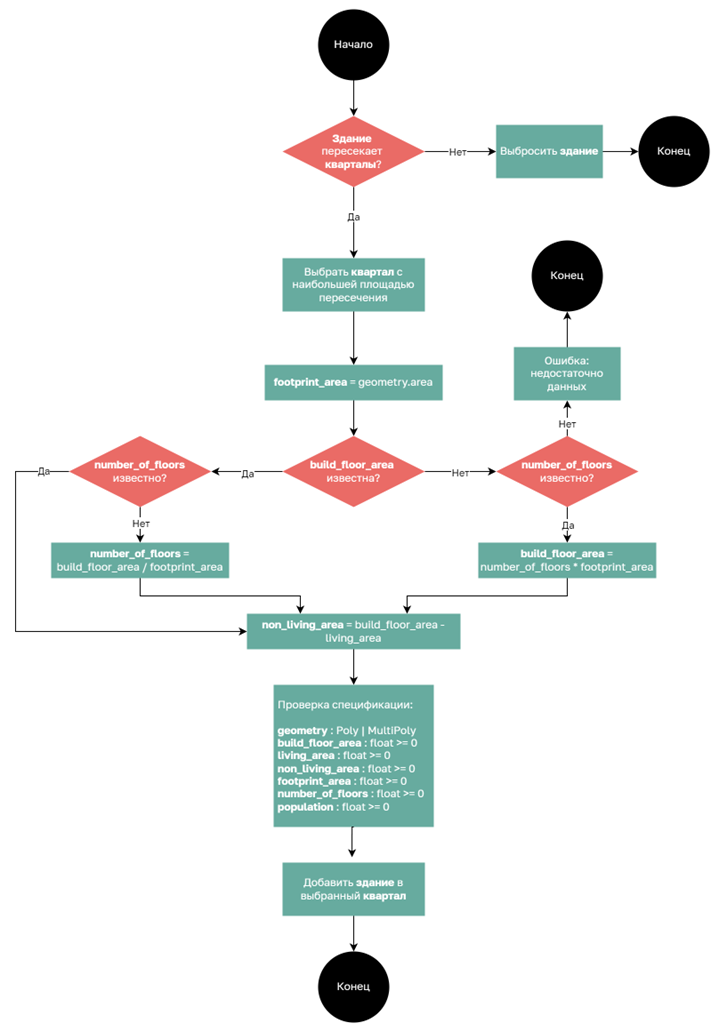

In [ ]:
buildings = buildings[buildings.geometry.type.isin(['Polygon', 'MultiPolygon'])]
buildings.head()

,geometry,build_floor_area,living_area,non_living_area,footprint_area,number_of_floors,population
0,"POLYGON ((332780.429 6625148.138, 332786.821 6...",70.392021,0.0,70.392021,70.392021,1.0,0.0
1,"POLYGON ((332558.194 6625328.600, 332574.863 6...",1590.291563,0.0,1590.291563,1590.291563,1.0,0.0
2,"POLYGON ((332652.618 6625257.573, 332738.280 6...",2113.092145,0.0,2113.092145,2113.092145,1.0,0.0
3,"POLYGON ((332559.698 6625209.224, 332620.128 6...",1060.172817,0.0,1060.172817,1060.172817,1.0,0.0
4,"POLYGON ((330548.064 6625350.270, 330569.092 6...",3313.152236,0.0,3313.152236,3313.152236,1.0,0.0


In [ ]:
# Сброс индекса, чтобы превратить индексы в обычные столбцы
buildings = buildings.reset_index(drop=True)
# Проверяем результат
buildings.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,geometry,build_floor_area,living_area,non_living_area,footprint_area,number_of_floors,population
0,"POLYGON ((332780.429 6625148.138, 332786.821 6...",70.392021,0.0,70.392021,70.392021,1.0,0.0
1,"POLYGON ((332558.194 6625328.600, 332574.863 6...",1590.291563,0.0,1590.291563,1590.291563,1.0,0.0
2,"POLYGON ((332652.618 6625257.573, 332738.280 6...",2113.092145,0.0,2113.092145,2113.092145,1.0,0.0
3,"POLYGON ((332559.698 6625209.224, 332620.128 6...",1060.172817,0.0,1060.172817,1060.172817,1.0,0.0
4,"POLYGON ((330548.064 6625350.270, 330569.092 6...",3313.152236,0.0,3313.152236,3313.152236,1.0,0.0


In [ ]:
#pd.set_option('display.max_columns', None) #посмотреть все столбцы
#buildings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for colums in buildings.columns:
  print(colums)


geometry
build_floor_area
living_area
non_living_area
footprint_area
number_of_floors
population


Метод **`apply()`** в pandas используется для применения пользовательской функции к каждому элементу объекта DataFrame или Series. Этот метод гибкий и позволяет выполнять различные операции как по строкам, так и по столбцам.

**Основные особенности `apply()`:**

Можно применять как встроенные функции, так и свои, созданные с помощью `lambda` или `def`.
Работает с параметром `axis`, который указывает, нужно ли применять функцию к строкам или к столбцам.

**`axis=1`** означает, что операция выполняется по строкам (то есть для каждой строки DataFrame).
**`axis=0`** (по умолчанию) означает, что операция выполняется по столбцам (для каждого столбца DataFrame).


---



Функции **lambda** в Python используются для создания кратких анонимных (безымянных) функций, которые часто применяются в ситуациях, когда вам нужна простая функция, и нет необходимости давать ей имя. Эти функции полезны в случаях, когда вам нужно выполнить небольшие, одноразовые операции, без написания полноценной функции с `def`.
```python
def my_func(x)
  return x * x

gdf['foobar'].apply(my_func)
```
**Тоже самое, что**
```python

gdf['foobar'].apply(lambda x : x*x)
```


---


**Пример использования**

```python
# 1. Количество этажей
buildings['number_of_floors'] = buildings.apply(
    lambda x: x['building:levels'] if x['building:levels'] > 1 else 1,
    axis=1
)
```



Как это работает:
**`lambda x:`** — это ключевое слово **`lambda`**, которое создает анонимную функцию. Здесь `x` представляет собой одну строку `(row)` вашего `GeoDataFrame`. Каждая строка передается в эту функцию поочередно.

`x['building:levels']` — это обращение к значению столбца `building:levels` для строки `x`. В этом случае `x` — это строка (row), а `x['building:levels']` — это значение конкретной ячейки в столбце `building:levels` для этой строки.

`if x['building:levels'] > 1` — это условие, которое проверяет, больше ли значение в столбце `building:levels` единицы для текущей строки. Если это условие истинно (то есть этажей больше `1`), то выполняется следующая часть.

`x['building:levels']` — если значение в столбце `building:levels` больше `1`, то возвращается это значение как есть.

`else 1` — если значение в столбце `building:levels` меньше или равно `1` (или отсутствует), возвращается значение `1`. Это предполагает, что минимальное значение количества этажей в любом здании — `1` (то есть хотя бы один этаж).

In [ ]:
# Преобразуем столбец 'building:levels' в числовой тип, ошибки будут заменены на NaN
buildings['building:levels'] = pd.to_numeric(buildings['building:levels'], errors='coerce')

# Заполним пропущенные значения (NaN) нулями или другими подходящими значениями
buildings = buildings.fillna(0)

# Добавляем или преобразуем необходимые атрибуты

# 1. Количество этажей (number_of_floors)
buildings['number_of_floors'] = buildings.apply(
    lambda x: x['building:levels'] if x['building:levels'] > 1 else 1,
    axis=1
)

# 2. Площадь застройки (footprint_area) - как площадь геометрии (основание здания)
buildings['footprint_area'] = buildings.geometry.area

# 3. Общая площадь всех этажей (build_floor_area) - footprint_area * number_of_floors
buildings['build_floor_area'] = buildings['footprint_area'] * buildings['number_of_floors']

# 4. Жилая площадь (living_area) и нежилая площадь (non_living_area)
# Жилая площадь будет рассчитываться только для жилых зданий
residential_tags = ['residential', 'house', 'apartments', 'detached', 'terrace', 'dormitory']
buildings['living_area'] = buildings.apply(
    lambda x: 0.8 * x['build_floor_area'] if x['building'] in residential_tags else 0,
    axis=1
)

# Нежилая площадь будет 20% от общей площади этажей
buildings['non_living_area'] = buildings['build_floor_area'] - buildings['living_area']

# 5. Население (population) - для жилых зданий
buildings['population'] = buildings.apply(
    lambda x: 48 * x['number_of_floors'] if x['building'] in residential_tags else 0,
    axis=1
)

# Теперь удалим все остальные столбцы, кроме 'geometry', 'build_floor_area', 'living_area', 'non_living_area',
# 'footprint_area', 'number_of_floors', 'population'
buildings = buildings[['geometry', 'build_floor_area', 'living_area', 'non_living_area',
                       'footprint_area', 'number_of_floors', 'population']]

# Проверим результат
buildings


KeyError: 'building:levels'

In [ ]:
buildings_new = gpd.read_file(os.path.join( 'b_n.geojson')) # считываем в переменную наши кварталы

In [ ]:
buildings_new = buildings_new.to_crs(local_crs) # переводим здания в локальную систему координат
buildings_new.crs

In [ ]:
# Преобразуем столбец 'building:levels' в числовой тип, ошибки будут заменены на NaN
buildings_new['building:levels'] = pd.to_numeric(buildings_new['building:levels'], errors='coerce')

# Заполним пропущенные значения (NaN) нулями или другими подходящими значениями
buildings_new = buildings_new.fillna(0)

# Добавляем или преобразуем необходимые атрибуты

# 1. Количество этажей (number_of_floors)
buildings_new['number_of_floors'] = buildings_new.apply(
    lambda x: x['building:levels'] if x['building:levels'] > 1 else 1,
    axis=1
)

# 2. Площадь застройки (footprint_area) - как площадь геометрии (основание здания)
buildings_new['footprint_area'] = buildings_new.geometry.area

# 3. Общая площадь всех этажей (build_floor_area) - footprint_area * number_of_floors
buildings_new['build_floor_area'] = buildings_new['footprint_area'] * buildings_new['number_of_floors']

# 4. Жилая площадь (living_area) и нежилая площадь (non_living_area)
# Жилая площадь будет рассчитываться только для жилых зданий
residential_tags = ['residential', 'house', 'apartments', 'detached', 'terrace', 'dormitory']
buildings_new['living_area'] = buildings_new.apply(
    lambda x: 0.8 * x['build_floor_area'] if x['building'] in residential_tags else 0,
    axis=1
)

# Нежилая площадь будет 20% от общей площади этажей
buildings_new['non_living_area'] = buildings_new['build_floor_area'] - buildings_new['living_area']

# 5. Население (population) - для жилых зданий
buildings_new['population'] = buildings_new.apply(
    lambda x: 48 * x['number_of_floors'] if x['building'] in residential_tags else 0,
    axis=1
)

# Теперь удалим все остальные столбцы, кроме 'geometry', 'build_floor_area', 'living_area', 'non_living_area',
# 'footprint_area', 'number_of_floors', 'population'
buildings_new = buildings_new[['geometry', 'build_floor_area', 'living_area', 'non_living_area',
                       'footprint_area', 'number_of_floors', 'population']]

# Проверим результат
buildings_new

## Загрузка зданий в модель

In [ ]:
Lagov.update_buildings(buildings_new) # загрузка зданий в модель

2024-12-24 17:01:12.964 | INFO     | blocksnet.models.city:update_buildings:1237 - Removing existing blocks from the model
2024-12-24 17:01:12.968 | INFO     | blocksnet.models.city:update_buildings:1241 - Joining buildings and blocks
2024-12-24 17:01:13.041 | WARNING  | blocksnet.models.city:update_buildings:1253 - 5 buildings did not intersect any block
Update blocks buildings: 100%|██████████| 3/3 [00:00<00:00, 245.36it/s]


,geometry,build_floor_area,living_area,non_living_area,footprint_area,number_of_floors,population
20,"POLYGON ((335866.962 6622606.920, 335866.958 6...",24455.238469,0,24455.238469,2717.248719,9.0,0
23,"POLYGON ((335591.274 6622498.508, 335577.077 6...",13837.434461,0,13837.434461,1537.492718,9.0,0
24,"POLYGON ((335451.749 6622430.135, 335447.040 6...",11221.899607,0,11221.899607,1246.877734,9.0,0
26,"POLYGON ((335363.090 6622337.039, 335276.313 6...",20643.200244,0,20643.200244,2293.688916,9.0,0
62,"POLYGON ((335335.024 6622430.277, 335335.024 6...",2393.426077,0,2393.426077,2393.426077,1.0,0


In [ ]:
Lagov.update_buildings(buildings) # загрузка зданий в модель

2024-12-24 17:01:17.076 | INFO     | blocksnet.models.city:update_buildings:1237 - Removing existing blocks from the model
2024-12-24 17:01:17.081 | INFO     | blocksnet.models.city:update_buildings:1241 - Joining buildings and blocks
Update blocks buildings: 100%|██████████| 63/63 [00:00<00:00, 143.83it/s]


,geometry,build_floor_area,living_area,non_living_area,footprint_area,number_of_floors,population


In [ ]:
Lagov.get_buildings_gdf() # проверим результат

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,block_id,geometry,population,footprint_area,build_floor_area,living_area,non_living_area,number_of_floors,is_living
id,,,,,,,,,
1800,0,"POLYGON ((333575.588 6622380.246, 333574.304 6...",0,49.554828,49.554828,0.000000,49.554828,1,False
465,0,"POLYGON ((333726.472 6622461.109, 333735.488 6...",0,105.645695,105.645695,0.000000,105.645695,1,False
485,0,"POLYGON ((333612.497 6622329.245, 333618.237 6...",0,115.397438,115.397438,0.000000,115.397438,1,False
1799,0,"POLYGON ((333641.189 6622324.073, 333646.830 6...",0,134.643027,134.643027,0.000000,134.643027,1,False
1807,0,"POLYGON ((333672.062 6622260.127, 333672.440 6...",0,261.465593,261.465593,0.000000,261.465593,1,False
...,...,...,...,...,...,...,...,...,...
1145,99,"POLYGON ((332666.829 6622844.878, 332669.530 6...",48,80.098857,80.098857,64.079086,16.019771,1,True
1141,99,"POLYGON ((332757.266 6622761.301, 332760.589 6...",48,81.944100,81.944100,65.555280,16.388820,1,True
1142,99,"POLYGON ((332749.773 6622780.271, 332753.095 6...",48,82.022579,82.022579,65.618063,16.404516,1,True


# Подготовка данных по сервисам

## Загрузка сервисов с OSM

In [ ]:
import geopandas as gpd
import os
import glob

data_directory = "/content/services"
file_pattern = os.path.join(data_directory, "*.geojson")

gdf_list = []


for file in glob.glob(file_pattern):
    gdf = gpd.read_file(file).to_crs(local_crs)
    gdf = gdf.rename(columns={'type':'service_type'})
    gdf_list.append(gdf)
gdf_list

[   name service_type                        geometry
 0  None   electronic  POINT (332072.123 6622615.518),
    name service_type                        geometry
 0  None         mall  POINT (332473.857 6622723.561),
                   name service_type                        geometry
 0  МФЦ «Мои документы»          mfz  POINT (332409.069 6622580.144),
        name service_type                        geometry
 0      None  convenience  POINT (332294.016 6622544.034)
 1      None  convenience  POINT (332474.011 6622725.227)
 2    Радуга  convenience  POINT (332285.603 6622559.578)
 3      None  convenience  POINT (331826.401 6622518.097)
 4      None  convenience  POINT (332528.328 6622458.746)
 5      None  convenience  POINT (334003.783 6623583.096)
 6  Продукты  convenience  POINT (332792.649 6624992.307),
            name service_type  \
 0          None      parking   
 1          None      parking   
 2          None      parking   
 3          None      parking   
 4  Штрафстоя

In [ ]:
places = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))
places.reset_index(drop=True, inplace=True)

In [ ]:
places

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,service_type,geometry,capacity,amenity,area
0,None,electronic,POINT (332072.123 6622615.518),NaN,NaN,NaN
1,None,mall,POINT (332473.857 6622723.561),NaN,NaN,NaN
2,МФЦ «Мои документы»,mfz,POINT (332409.069 6622580.144),NaN,NaN,NaN
3,None,convenience,POINT (332294.016 6622544.034),NaN,NaN,NaN
4,None,convenience,POINT (332474.011 6622725.227),NaN,NaN,NaN
...,...,...,...,...,...,...
68,Почтовое отделение № 188517,post_office,POINT (332293.810 6622632.194),NaN,NaN,NaN
69,None,pitch,POINT (332621.961 6625113.151),NaN,NaN,NaN
70,None,pitch,POINT (332595.773 6622506.864),NaN,NaN,NaN
71,КСК «Лаголово»,pitch,POINT (332663.123 6622270.759),NaN,NaN,NaN


In [ ]:
places = places.to_crs(local_crs) # переводим все сервисы в локальную систему координат
places.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
Lagov.add_service_type(ServiceType(code='', name='estate_agent', accessibility=30, demand=100, land_use = ['residential', 'business', 'special'],  bricks=[  {"capacity": 20, "area": 50.0, "is_integrated": False, "parking_area": 0},
            {"capacity": 28, "area": 70.0, "is_integrated": False, "parking_area": 0},
            {"capacity": 45, "area": 100.0, "is_integrated": False, "parking_area": 0}]))
Lagov['estate_agent']

ServiceType(code='', name='estate_agent', accessibility=30, demand=100, land_use=[<LandUse.RESIDENTIAL: 'residential'>, <LandUse.BUSINESS: 'business'>, <LandUse.SPECIAL: 'special'>], bricks=[ServiceBrick(capacity=20, area=50.0, is_integrated=False, parking_area=0.0), ServiceBrick(capacity=28, area=70.0, is_integrated=False, parking_area=0.0), ServiceBrick(capacity=45, area=100.0, is_integrated=False, parking_area=0.0)])

In [ ]:
Lagov.add_service_type(ServiceType(code='', name='estate_agent', accessibility=30, demand=100, land_use = ['residential', 'business', 'special'],  bricks=[  {"capacity": 20, "area": 50.0, "is_integrated": False, "parking_area": 0},
            {"capacity": 28, "area": 70.0, "is_integrated": False, "parking_area": 0},
            {"capacity": 45, "area": 100.0, "is_integrated": False, "parking_area": 0}]))
Lagov['estate_agent']

In [ ]:
from blocksnet import ServiceType

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Работа с сервисами

**Текст про атрибуты сервисво**

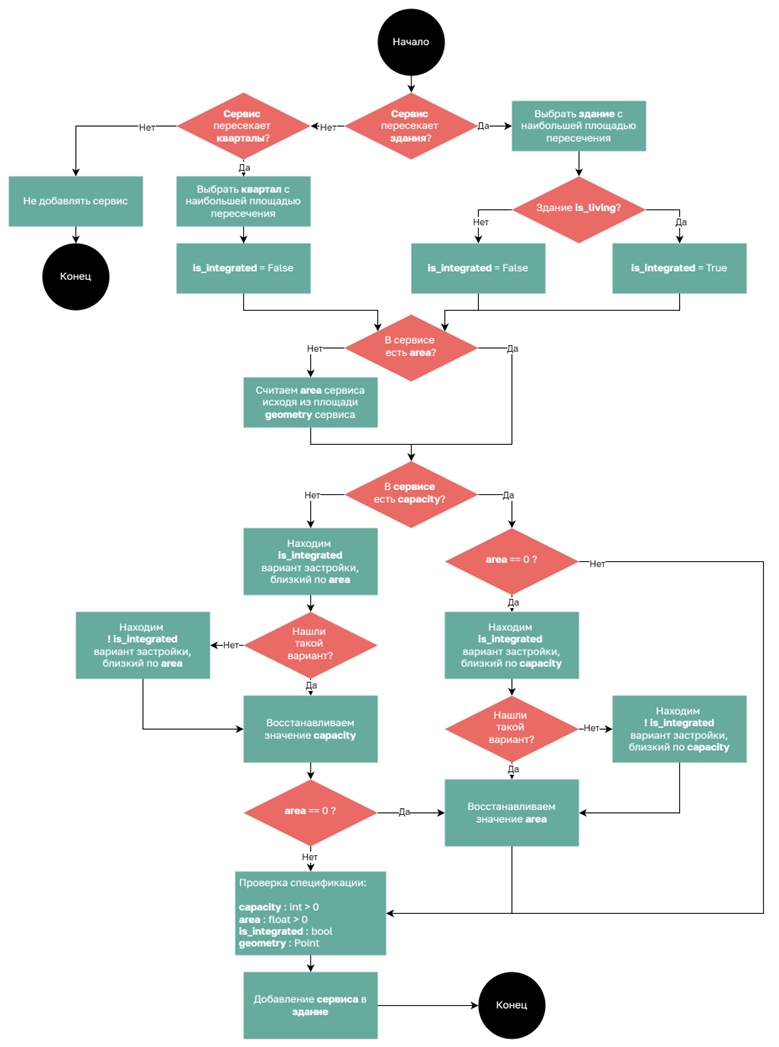

In [ ]:
Lagov

In [ ]:
from blocksnet.models.service_type import ServiceType

In [ ]:
Lagov['estate_agent'] # какие школы могут быть в модели города

ServiceType(code='', name='estate_agent', accessibility=30, demand=100, land_use=[<LandUse.RESIDENTIAL: 'residential'>, <LandUse.BUSINESS: 'business'>, <LandUse.SPECIAL: 'special'>], bricks=[ServiceBrick(capacity=20, area=50.0, is_integrated=False, parking_area=0.0), ServiceBrick(capacity=28, area=70.0, is_integrated=False, parking_area=0.0), ServiceBrick(capacity=45, area=100.0, is_integrated=False, parking_area=0.0)])

In [ ]:
places.explore()

`.iterrows()` — это метод в Pandas и GeoPandas, который возвращает итератор для обхода строк в DataFrame или GeoDataFrame построчно. Каждая итерация возвращает индекс строки и содержимое строки в виде пары `(index, Series)`.

### Как это работает:

- `index` — это индекс строки.
- `Series` — это объект Pandas, представляющий одну строку (включая все её столбцы).

### Пример использования:

```python
import geopandas as gpd

# Пример GeoDataFrame
gdf
# Итерация по строкам GeoDataFrame
for index, row in gdf.iterrows():
    print(f"Индекс: {index}")
    print(f"Значения строки: {row}")


In [ ]:
# Можно не выполнять
import geopandas as gpd
from shapely.geometry import Point

# Шаг 1: Удаляем меньшие полигоны внутри больших полигонов (вложенные полигоны)

# Удаляем полигоны зданий, которые находятся внутри полигонов школ
def remove_inner_polygons(gdf_polygons):
    to_remove = []
    for idx, poly1 in gdf_polygons.iterrows():
        for idx2, poly2 in gdf_polygons.iterrows():
            if idx != idx2 and poly1.geometry.contains(poly2.geometry):
                to_remove.append(idx2)
    return gdf_polygons.drop(to_remove)

places = remove_inner_polygons(places)

# Шаг 2: Преобразуем оставшиеся полигоны в центроиды
places['geometry'] = places.centroid

# Шаг 3: Удаляем близкие центроиды, оставляя одну точку на буфер
def remove_close_centroids(gdf_centroids, buffer_distance=60):
    # Создаем новый GeoDataFrame для хранения итоговых точек
    final_centroids = gpd.GeoDataFrame(columns=gdf_centroids.columns, crs=gdf_centroids.crs)

    # Итерируем по всем точкам
    while not gdf_centroids.empty:
        # Берем первую точку
        current_point = gdf_centroids.iloc[0]

        # Создаем буфер вокруг этой точки
        buffer = current_point.geometry.buffer(buffer_distance)

        # Находим все точки, которые попадают в этот буфер
        close_points = gdf_centroids[gdf_centroids.geometry.within(buffer)]

        # Добавляем одну (например, первую) точку в итоговый результат с помощью concat
        final_centroids = gpd.GeoDataFrame(
            pd.concat([final_centroids, gpd.GeoDataFrame([current_point])], ignore_index=True)
        )

        # Удаляем все точки, попавшие в этот буфер, из исходного списка
        gdf_centroids = gdf_centroids.drop(close_points.index)

    return final_centroids

# Применяем функцию удаления близких центроидов
sport_centre = remove_close_centroids(places)




/usr/local/lib/python3.10/dist-packages/geopandas/array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 36N (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 36N (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 36N (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 36N (the single n

In [ ]:
places.explore()

In [ ]:
places_geometry = places['geometry'] # оставялем только геометрию школ
places_geometry

,geometry
0,POINT (332072.123 6622615.518)
1,POINT (332473.857 6622723.561)
2,POINT (332409.069 6622580.144)
3,POINT (332294.016 6622544.034)
4,POINT (332474.011 6622725.227)
...,...
68,POINT (332293.810 6622632.194)
69,POINT (332621.961 6625113.151)
70,POINT (332595.773 6622506.864)
71,POINT (332663.123 6622270.759)


## Загрузка сервисов в модель

In [ ]:
Lagov.update_services('places', places)

KeyError: "Can't find service type with such name: places"

In [ ]:
services_gdf = Lagov.get_services_gdf()
services_gdf

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (335802.370 6623324.435),70,912,estate_agent,20,50.0,False


In [ ]:
from blocksnet import ServiceType

Lagov.add_service_type(ServiceType(code='', name='outpost', accessibility=30, demand=100, bricks=[]))
Lagov['outpost']

KeyError: 'The service type with this name already exists: outpost'

### Параметры
- **code**: `str`
  - Код, идентифицирующий тип сервиса.
- **name**: `str`
  - Уникальное название типа сервиса.
- **accessibility**: `int`, опционально
  - Среднее время доступности (в минутах). Должно быть равно или больше 0.
- **demand**: `int`, опционально
  - Спрос на данный тип сервиса на 1000 человек населения. Должен быть равен или больше 0.
- **land_use**: `list[LandUse]`, опционально
  - Список категорий землепользования, связанных с типом сервиса. По умолчанию пустой список.
- **bricks**: `list[ServiceBrick]`, опционально
  - Список "кирпичиков" или модулей, доступных для данного типа сервиса. По умолчанию пустой список.


# Работа с моделью

## Определение типа землипользования

In [ ]:
from blocksnet import LandUsePrediction # импортируем модуль

lup = LandUsePrediction(city_model=Lagov)
lu_blocks = lup.calculate()
lu_blocks

100%|██████████| 104/104 [00:00<00:00, 277.84it/s]


,geometry,land_use
id,,
0,"POLYGON ((333323.312 6622195.666, 333492.308 6...",None
1,"POLYGON ((332093.546 6621911.376, 331958.920 6...",None
2,"POLYGON ((332689.530 6621987.082, 332689.511 6...",None
3,"POLYGON ((332105.166 6620336.872, 331376.389 6...",None
4,"POLYGON ((333135.437 6622119.708, 333086.687 6...",None
...,...,...
99,"POLYGON ((332629.584 6622881.096, 332712.260 6...",None
100,"POLYGON ((330632.299 6624257.720, 330771.703 6...",None
101,"POLYGON ((330771.703 6624034.109, 330632.299 6...",None


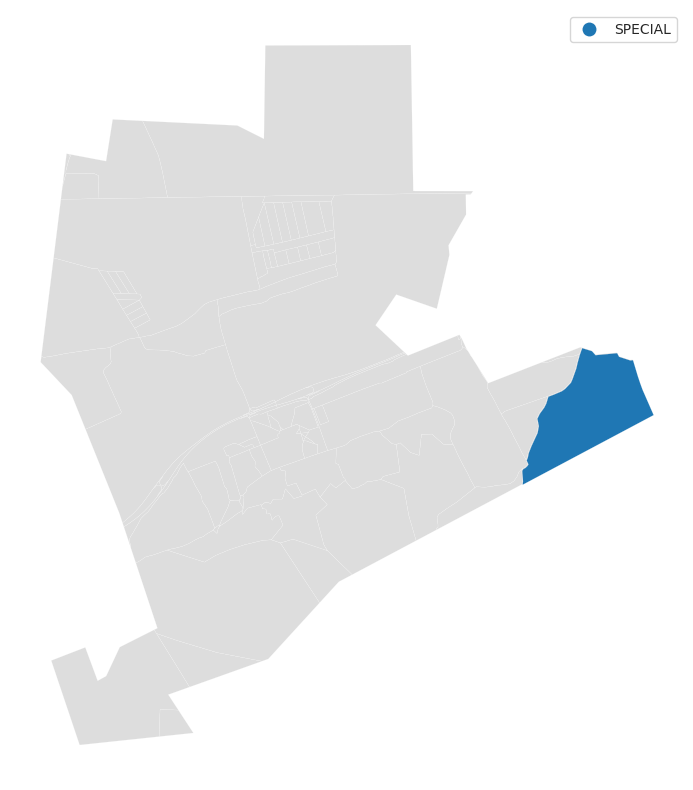

In [ ]:
lup.plot(lu_blocks)

In [ ]:
Lagov.update_land_use(lu_blocks) # добавление в модель типов землипользования

## Обеспеченность

In [ ]:
from blocksnet import Provision, ProvisionMethod

# for service_type in ['school', 'kindergarten', 'college', 'university']:
#   prov = ...
#   prov_res = blablalba
#   prov.plot(...)

service_type = 'estate_agent'
prov = Provision(city_model=Lagov)
prov_res = prov.calculate(service_type)

2024-12-24 16:50:35.496 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 30 : 37x1
2024-12-24 16:50:35.509 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-24 16:50:35.529 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-24 16:50:35.541 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


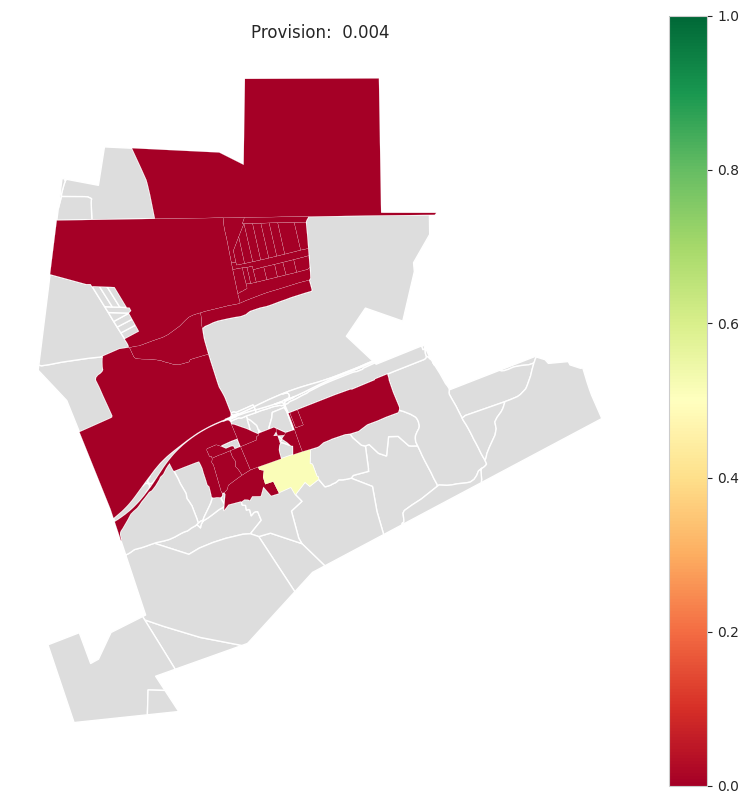

In [ ]:
prov.plot(prov_res)

In [ ]:
prov_res.to_file('provision_gravity.geojson') # Сохранить обеспеченность

## Сохранение модели

In [ ]:
Lagov.to_pickle('Lagov_model(2.4).pickle')

In [ ]:
Lagov = City.from_pickle('Lagov_model(2.4).pickle') # считываем в переменную готовую модель
print(Lagov)

CRS : EPSG:32636
Blocks : 104
Service types : 1/67
Buildings : 1868
Services : 1

